In [ ]:
import random, string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set()
plt.style.use("seaborn-notebook")
plt.rcParams['figure.figsize'] = 12, 8

## Genetic Algorithm

The purpose of this exercise is to demonstrate the use of a genetic algorithm to converge on a desired target phrase. The process is as follows:
- Create an initial population of phrases of the same length as the desired phrase, comprising random letters and puncuation
- Calculate the *fittness* of each phrase (similarity to target)
- Create a *mating pool* from population, with fit phrases appearing more times than unfit ones
- Randomly select two *parents* from the mating pool, and randomly *cross (breed)* them
- Apply mutation to the child phrase
- Add child phase to new population
- Repeat until population is completely replaced
- Repeat all the above until the algorithm converges on the target phrase

In [3]:
class Phrase:
    '''Random string composed of alphabetic and puncuation characters of length(target)'''
    def __init__(self, target):
        self.length = len(target)
        self.phrase = ''.join(random.choice(string.ascii_letters + string.punctuation + ' ') for ii in range(self.length))

In [4]:
class Population:
    '''List of Phrases()'''
    def __init__(self, pop_size, target):
        self.pop_size = pop_size
        self.elements = [Phrase(target) for ii in range(pop_size)]

### 1. Initialisation

In [5]:
def initial_population(pop_size, target):
    '''Generating initial population'''
    population = [element.phrase for element in Population(pop_size, target).elements]
    return population

### 2. Fitness Calculation

In [6]:
def fitness(population, target):
    '''Creating a dictionary of each phrase and its fitness score (similarity to target)'''
    
    fitness_results = {}
    fitness_sum = 0
    for phrase in population:
        fitness_results[phrase] = sum(1 for ii in range(len(phrase)) if phrase[ii] == target[ii])
        fitness_sum += fitness_results[phrase]
    
    # Acquiring best and average fitness values to monitor progress of algorithm while running
    best_phrase = max(fitness_results, key=fitness_results.get)
    best_fit = best_fitness_percent(target, best_phrase, fitness_results)
    best_tup = (best_phrase, best_fit)
    
    avg_fit = avg_fitness_percent(target, fitness_sum, fitness_results)
    
    return fitness_results, best_tup, avg_fit

In [7]:
def avg_fitness_percent(target, fitness_sum, fitness_results):
    return round(((fitness_sum / len(fitness_results)) / len(target)) * 100, 2)

In [8]:
def best_fitness_percent(target, best_phrase, fitness_results):
    return (fitness_results[best_phrase] / len(target)) * 100

### 3. Selection

In [9]:
def create_mating_pool(fitness_results, target):
    '''Creating a pool from the population with each phrase appearing n times,
       where n is a function of a phrase's fitness score.'''
    
    mating_pool = []
    for phrase, fit in fitness_results.items():
        for ii in range(fit):
            mating_pool.append(phrase)

    return mating_pool

In [10]:
def select_parents(mating_pool):
    '''Randomly selecting 2 parents from Mating Pool'''
    
    parent1, parent2 = random.sample(mating_pool, k=2)
    while parent1 == parent2:
        parent1 = random.choice(mating_pool)
        
    return parent1, parent2

### 4. Crossover

In [11]:
def crossover(parents):
    '''Creating child phrase (as list for mutability) with alternating characters from parents'''
    
    crossed_child = []
    for ii in range(len(parents[0])):
        choice = parents[random.randint(0, 1)]
        crossed_child.append(choice[ii])
        
    return crossed_child

### 5. Mutation

In [12]:
def mutate(child, mutation_rate):
    '''For each character in a child phrase, there is a (mutation_rate * 100)% chance that
       that character will be replaced with a random character'''
    
    for ii in range(len(child)):
        if random.random() < mutation_rate:
            child[ii] = random.choice(string.ascii_letters + string.punctuation + ' ')
            
    return ''.join(child)

### 6. Implementation

In [13]:
def next_generation(population, target, pop_size, mutation_rate):
    '''Each iteration of the genetic algorithm, creating an entirely new
       population from parents selected from the mating pool'''

    fitness_results, best_tup, avg_fitness = fitness(population, target)
    mating_pool = create_mating_pool(fitness_results, target)
    
    for ii in range(pop_size):  # Generate new population
        parents = select_parents(mating_pool)
        crossed_child = crossover(parents)
        mutated_child = mutate(crossed_child, mutation_rate)
        population[ii] = mutated_child
    
    return population, best_tup, avg_fitness

In [14]:
def main(target, pop_size, mutation_rate, max_gens=None, verbose=False):
    '''Set max_gens to avoid infinite loop.
    Set verbose=True to observe the algorithm through each generation'''
    
    random.seed(4404)
    population = initial_population(pop_size, target)  # Generate initial population
    
    avg_fit_list, best_fit_list = [], []
    gen_num = 0  # purely for observation purposes
    best_fit = 0
    
    while best_fit < 100:  # Finish when algorithm converges on target phrase
        
        if gen_num == max_gens:
            break
        
        population, best_tup, avg_fitness = next_generation(population, target, pop_size, mutation_rate)
        best_phrase, best_fit = best_tup
        gen_num += 1
        if verbose:
            print_gen_res(gen_num, best_phrase, best_fit, avg_fitness)
        avg_fit_list.append(avg_fitness)
        best_fit_list.append(best_fit)
    
    make_plot(avg_fit_list, best_fit_list)
    print_success(target, pop_size, mutation_rate, gen_num)

In [15]:
def make_plot(avg, best):
    '''Generate plot of genetic algorithm through each generation'''
    
    x_ax = list(range(len(avg)))
    sns.lineplot(x=x_ax, y=avg, color="#5AC1CE", label="Average Fitness")
    sns.lineplot(x=x_ax, y=best, color="#EA9262", label="Best Fitness")
    plt.xlabel("Generations")
    plt.ylabel("Fitness (%)")
    plt.show()

In [16]:
def print_gen_res(gen_num, best_phrase, best_fit, avg_fitness):
    '''Print status of each generation of algorithm'''
    print(f"Gen {gen_num}\nBest: {best_phrase}  ( {best_fit:.2f}% )\nAvg Fitness: {avg_fitness}%\n")

In [17]:
def print_success(target, pop_size, mutation_rate, gen_num):
    '''Print algorithm summary after convergence'''
    
    print(
        "\nSUMMARY\n"
        f"{'Target phrase:':<25} {target:>10}\n"
        f"{'Population size:':<25} {pop_size:>10}\n"
        f"{'Mutation rate:':<25} {mutation_rate:>10}\n\n" 

        f"{'No. of generations:':<25} {gen_num:>10}"
    )

Gen 1
Best: PD.s,d  ( 16.67% )
Avg Fitness: 0.92%

Gen 2
Best: .-PCon  ( 33.33% )
Avg Fitness: 17.44%

Gen 3
Best: PDyhod  ( 50.00% )
Avg Fitness: 24.02%

Gen 4
Best: PgPhon  ( 66.67% )
Avg Fitness: 30.89%

Gen 5
Best: Python  ( 100.00% )
Avg Fitness: 35.54%



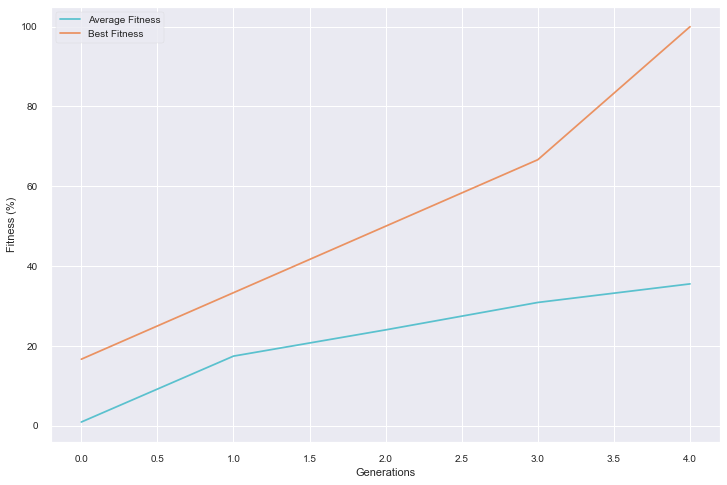


SUMMARY
Target phrase:                Python
Population size:                 200
Mutation rate:                  0.02

No. of generations:                5


In [18]:
main(target="Python", pop_size=200, mutation_rate=0.02, max_gens=1500, verbose=True)

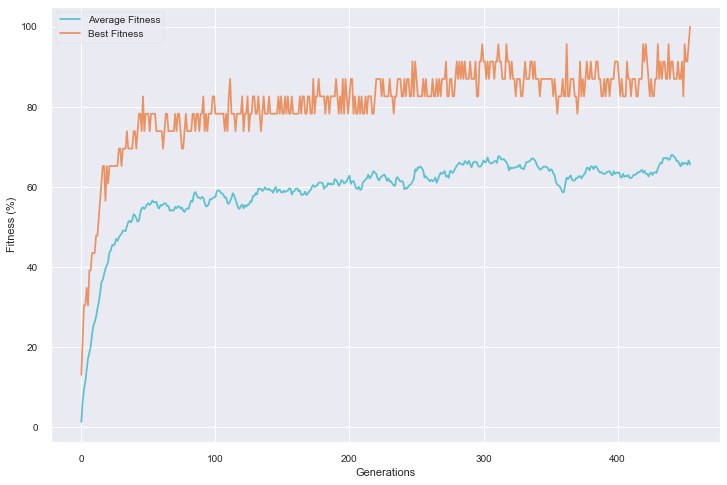


SUMMARY
Target phrase:            I *love* Genetic Algos!
Population size:                 200
Mutation rate:                  0.02

No. of generations:              455


In [19]:
main(target="I *love* Genetic Algos!", pop_size=200, mutation_rate=0.02, max_gens=1500, verbose=False)